# CNN
A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data. CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series, and signal data.
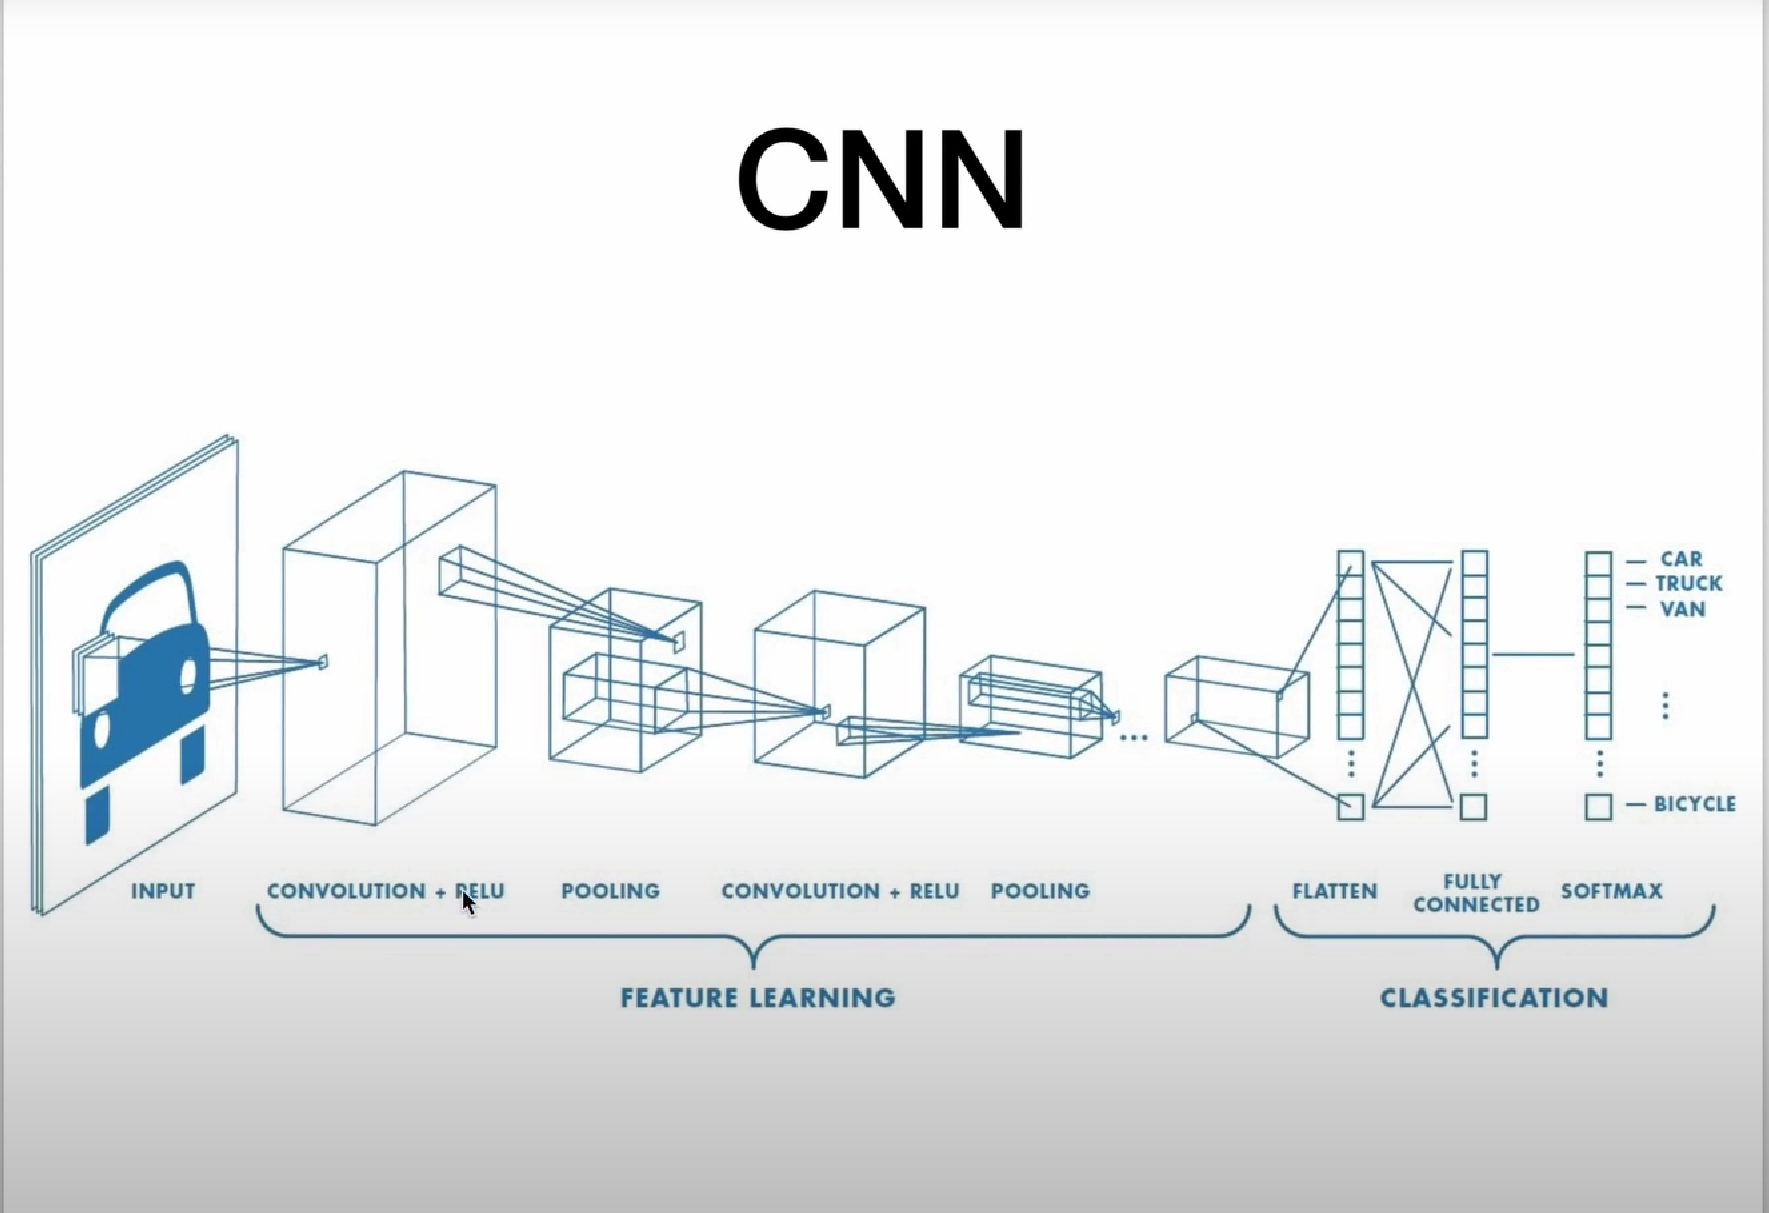


# Implemetation of CNN in pytorch

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#setting the device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
num_epocs=4
batch_size=4
learning_rate=0.001

In [6]:
transforms=transform.Compose([
    transform.ToTensor(),
    transform.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))

])

In [7]:
train_dataset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform.ToTensor())
test_dataset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform.ToTensor())


#implementing data loader

train_loader=torch.utils.data.DataLoader(train_dataset,shuffle =True,batch_size=batch_size)
test_loader=torch.utils.data.DataLoader(test_dataset,shuffle =True,batch_size=batch_size)


Files already downloaded and verified
Files already downloaded and verified


In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [20]:
class cnn(nn.Module):
    def __init__(self):
        super(cnn, self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,90)
        self.fc3=nn.Linear(90,10)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        return x





In [21]:
model = cnn().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
num_epochs=num_epocs
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/4], Step [2000/12500], Loss: 2.2996
Epoch [1/4], Step [4000/12500], Loss: 2.3060
Epoch [1/4], Step [6000/12500], Loss: 2.3206
Epoch [1/4], Step [8000/12500], Loss: 2.2985
Epoch [1/4], Step [10000/12500], Loss: 2.2858
Epoch [1/4], Step [12000/12500], Loss: 2.2926
Epoch [2/4], Step [2000/12500], Loss: 2.2839
Epoch [2/4], Step [4000/12500], Loss: 2.2973
Epoch [2/4], Step [6000/12500], Loss: 2.3209
Epoch [2/4], Step [8000/12500], Loss: 2.2844
Epoch [2/4], Step [10000/12500], Loss: 2.1527
Epoch [2/4], Step [12000/12500], Loss: 1.9076
Epoch [3/4], Step [2000/12500], Loss: 1.7884
Epoch [3/4], Step [4000/12500], Loss: 1.4444
Epoch [3/4], Step [6000/12500], Loss: 2.1211
Epoch [3/4], Step [8000/12500], Loss: 1.8052
Epoch [3/4], Step [10000/12500], Loss: 1.7902
Epoch [3/4], Step [12000/12500], Loss: 2.0950
Epoch [4/4], Step [2000/12500], Loss: 2.1152
Epoch [4/4], Step [4000/12500], Loss: 1.9646
Epoch [4/4], Step [6000/12500], Loss: 2.1451
Epoch [4/4], Step [8000/12500], Loss: 1.6345
Epoc

In [23]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 34.36 %
Accuracy of plane: 41.5 %
Accuracy of car: 40.1 %
Accuracy of bird: 4.4 %
Accuracy of cat: 25.0 %
Accuracy of deer: 37.5 %
Accuracy of dog: 8.9 %
Accuracy of frog: 52.4 %
Accuracy of horse: 40.8 %
Accuracy of ship: 42.5 %
Accuracy of truck: 50.5 %
